# Red convolucional con Cifar100
_Por: Alfredo Villegas_

En el siguiente trabajo se implementará un modelo de clasificación de imágenes utilizando una CNN en el conjunto de datos cifar 100.

La primera celda importa las librerías necesarias para trabajar con TensorFlow y Keras, así como las librerías Numpy y Matplotlib. Además importamos las funciones personales.

In [1]:
import tensorflow as tf
from keras.layers import (
    Conv2D,
    Dropout,
    MaxPooling2D,
    Flatten,
    Dense,
    BatchNormalization,
    Activation,
)
from keras import regularizers

import numpy as np

import matplotlib.pyplot as plt

import keras.datasets.cifar100 as cifar100


tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

En esta celda, se cargan los conjuntos de datos de entrenamiento y prueba para el problema de reconocimiento de dígitos en el dataset cifar100.

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [3]:
train_labels[4]

array([1])

Se muestra un ejemplo de una de las imágenes:

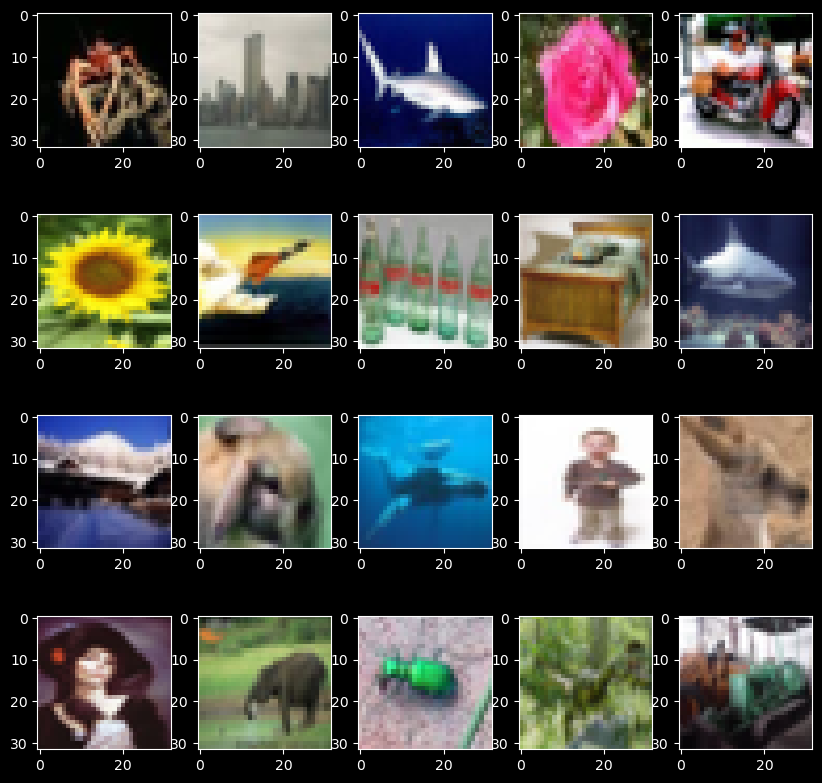

In [4]:
plt.figure(figsize=(10, 10))
for i in range(20):
    seed = None
    rng = np.random.default_rng(seed=seed)
    random_number = rng.integers(low=0,high=50000)
    cifar_img = plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[random_number])

En esta celda, se llevan a cabo algunas transformaciones en los conjuntos de datos antes de ser utilizados para entrenar y probar el modelo:

1. "train_images" y "test_images" se normalizan dividiendo cada valor de píxel por 255. Esto se hace para escalar los valores de píxeles en el rango de 0 a 1, lo que facilita el procesamiento para el modelo de aprendizaje automático.

2. Luego, se modifica la forma de "train_images" y "test_images" para que sean compatibles con la entrada del modelo. Se cambia la forma de las matrices de 2D (28x28) a matrices de 3D (28x28x1), agregando una dimensión adicional que representa el número de canales de la imagen (en este caso, 1 canal porque son imágenes en escala de grises).

3. Las etiquetas de entrenamiento y prueba ("train_labels" y "test_labels") se convierten en forma de one-hot encoding utilizando la función "to_categorical" de Keras. Esto convierte las etiquetas enteras en vectores binarios de 10 dimensiones, donde cada dimensión representa una clase diferente. Esto es útil para entrenar un modelo de clasificación de múltiples clases.

En resumen, estas líneas de código normalizan las imágenes, ajustan sus formas y convierten las etiquetas en one-hot encoding, preparando los datos para su posterior uso en el entrenamiento del modelo de aprendizaje automático.

In [5]:
train_images = train_images.astype('float32') / 255 
test_images =  test_images.astype('float32') / 255 

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [6]:
(train_images, valid_images) = train_images[5000:], train_images[:5000]
(train_labels, valid_labels) = train_labels[5000:], train_labels[:5000]

In [7]:
base_filtros = 64
# w_regularizer = 1e-4
n_clases = 100
train_images.shape

(45000, 32, 32, 3)

In [8]:
train_images.shape

(45000, 32, 32, 3)

En esta celda, se define la arquitectura del modelo de red neuronal convolucional utilizando la interfaz secuencial de Keras:


In [17]:
model = tf.keras.Sequential()
# Conv 1
model.add(
    Conv2D(
        filters=base_filtros,
        kernel_size=(3, 3),
        padding="same",
        # kernel_regularizer=regularizers.l2(w_regularizer),
        input_shape=train_images.shape[1:],
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# - - - - - - - - - - - - - - - - - - - - -- - -
# Conv 2
model.add(
    Conv2D(
        filters=base_filtros,
        kernel_size=(3, 3),
        padding="same",
        # kernel_regularizer=regularizers.l2(w_regularizer),
    )
)
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# - - - - - - - - - - - - - - - - - - - - -- - -
# Conv 3
model.add(
    Conv2D(
        filters=2 * base_filtros,
        kernel_size=(3, 3),
        padding="same",
        # kernel_regularizer=regularizers.l2(w_regularizer),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# - - - - - - - - - - - - - - - - - - - - -- - -
# Conv 4
model.add(
    Conv2D(
        filters=4 * base_filtros,
        kernel_size=(3, 3),
        padding="same",
        # kernel_regularizer=regularizers.l2(w_regularizer),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# - - - - - - - - - - - - - - - - - - - - -- - -
# Conv 5
model.add(
    Conv2D(
        filters=8 * base_filtros,
        kernel_size=(3, 3),
        padding="same",
        # kernel_regularizer=regularizers.l2(w_regularizer),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# - - - - - - - - - - - - - - - - - - - - -- - -
# Conv 6
model.add(
    Conv2D(
        filters=8 * base_filtros,
        kernel_size=(3, 3),
        padding="same",
        # kernel_regularizer=regularizers.l2(w_regularizer),
    )
)
model.add(Activation("relu"))
model.add(BatchNormalization())
# model.add(MaxPooling2D())
model.add(Dropout(0.2))

# - - - - - - - - - - - - - - - - - - - - -- - -
## Clasificación - Flatten
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(n_clases, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_24 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 64)       

Este código a continuación configura el modelo para que utilice la función de pérdida categorical_crossentropy, el optimizador rmsprop y la métrica de precisión durante el entrenamiento.

In [10]:
model.compile(
    loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)
early = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=1)

Se almacena el historico del entrenamiento del modelo

In [11]:
hist = model.fit(
    train_images,
    train_labels,
    callbacks=[early],
    validation_data=(valid_images, valid_labels),
    batch_size=32,
    epochs=100,
    verbose=2,
    shuffle=True,
)

Epoch 1/100
1407/1407 - 31s - loss: 4.5833 - accuracy: 0.0274 - val_loss: 4.4161 - val_accuracy: 0.0446 - 31s/epoch - 22ms/step
Epoch 2/100
1407/1407 - 27s - loss: 3.8888 - accuracy: 0.0960 - val_loss: 3.7373 - val_accuracy: 0.1214 - 27s/epoch - 19ms/step
Epoch 3/100
1407/1407 - 27s - loss: 3.3599 - accuracy: 0.1836 - val_loss: 3.9338 - val_accuracy: 0.1424 - 27s/epoch - 19ms/step
Epoch 4/100
1407/1407 - 26s - loss: 2.9977 - accuracy: 0.2540 - val_loss: 3.7547 - val_accuracy: 0.2032 - 26s/epoch - 19ms/step
Epoch 5/100
1407/1407 - 26s - loss: 2.6468 - accuracy: 0.3243 - val_loss: 2.7978 - val_accuracy: 0.3016 - 26s/epoch - 18ms/step
Epoch 6/100
1407/1407 - 26s - loss: 2.3205 - accuracy: 0.3902 - val_loss: 2.4865 - val_accuracy: 0.3740 - 26s/epoch - 18ms/step
Epoch 7/100
1407/1407 - 26s - loss: 2.0309 - accuracy: 0.4572 - val_loss: 2.5338 - val_accuracy: 0.3640 - 26s/epoch - 18ms/step
Epoch 8/100
1407/1407 - 26s - loss: 1.7511 - accuracy: 0.5221 - val_loss: 2.3220 - val_accuracy: 0.4142 

In [12]:
print(model.evaluate(test_images, test_labels, verbose=0)[1])

0.49709999561309814


A continuación se expresa una gráfica del entrenamiento del modelo a lo largo de cada una de las épocas, se puede apreciar cómo la precisión va aumentando a medida que avanzan las épocas. Además, se demuestra que agregar más capas de convolución aumentando la cantidad de filtros puede conllevar un mejor aprendizaje, no obstante se aprecia que ya al agregar una tercera capa no mejora el aprendizaje de forma considerable.

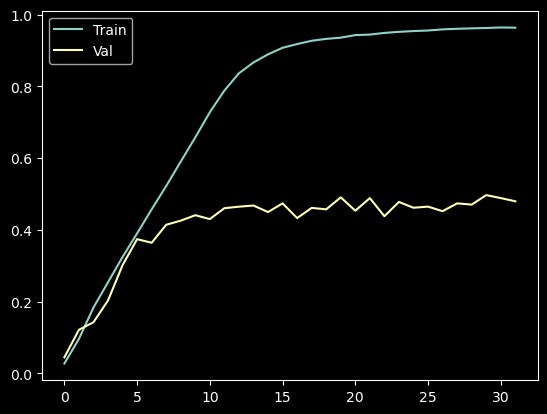

In [13]:
plt.plot(hist.history["accuracy"], label="Train")
plt.plot(hist.history["val_accuracy"], label="Val")

plt.legend()

plt.show()